### MTH9831_Homework11_Group1
Boyu Yang, Julius Gruber, Yicheng Sun, Ziyuan Li

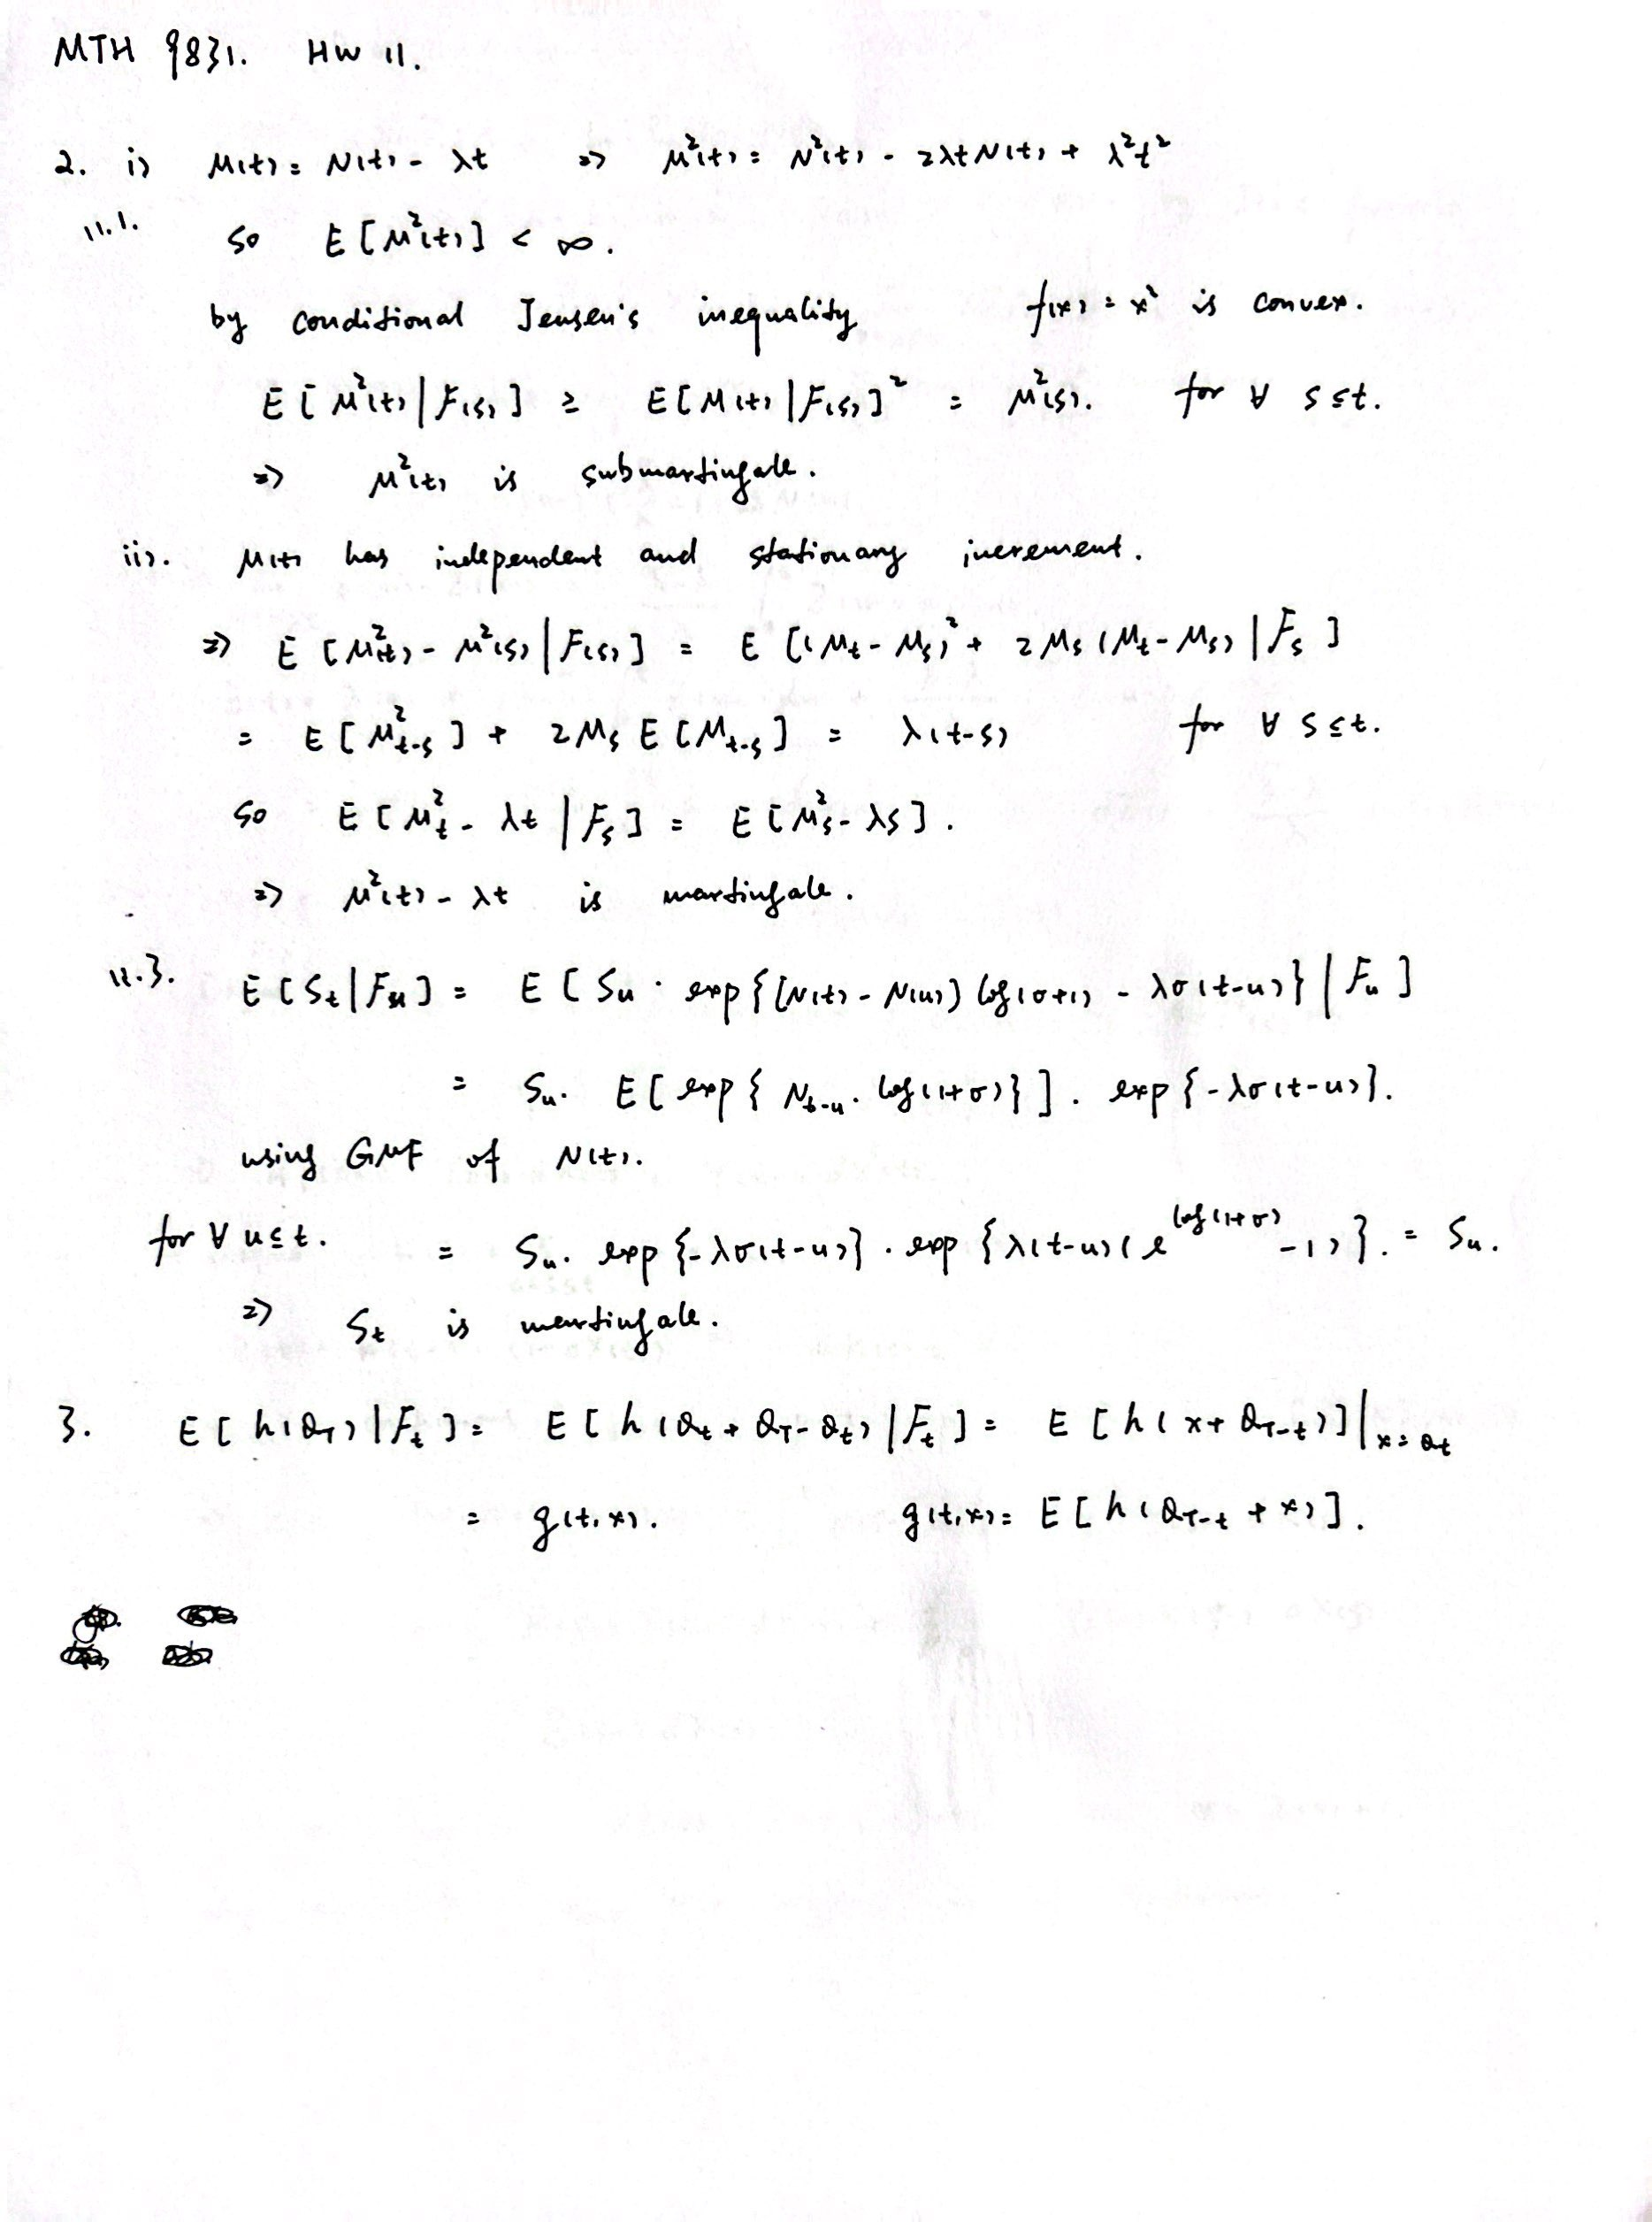

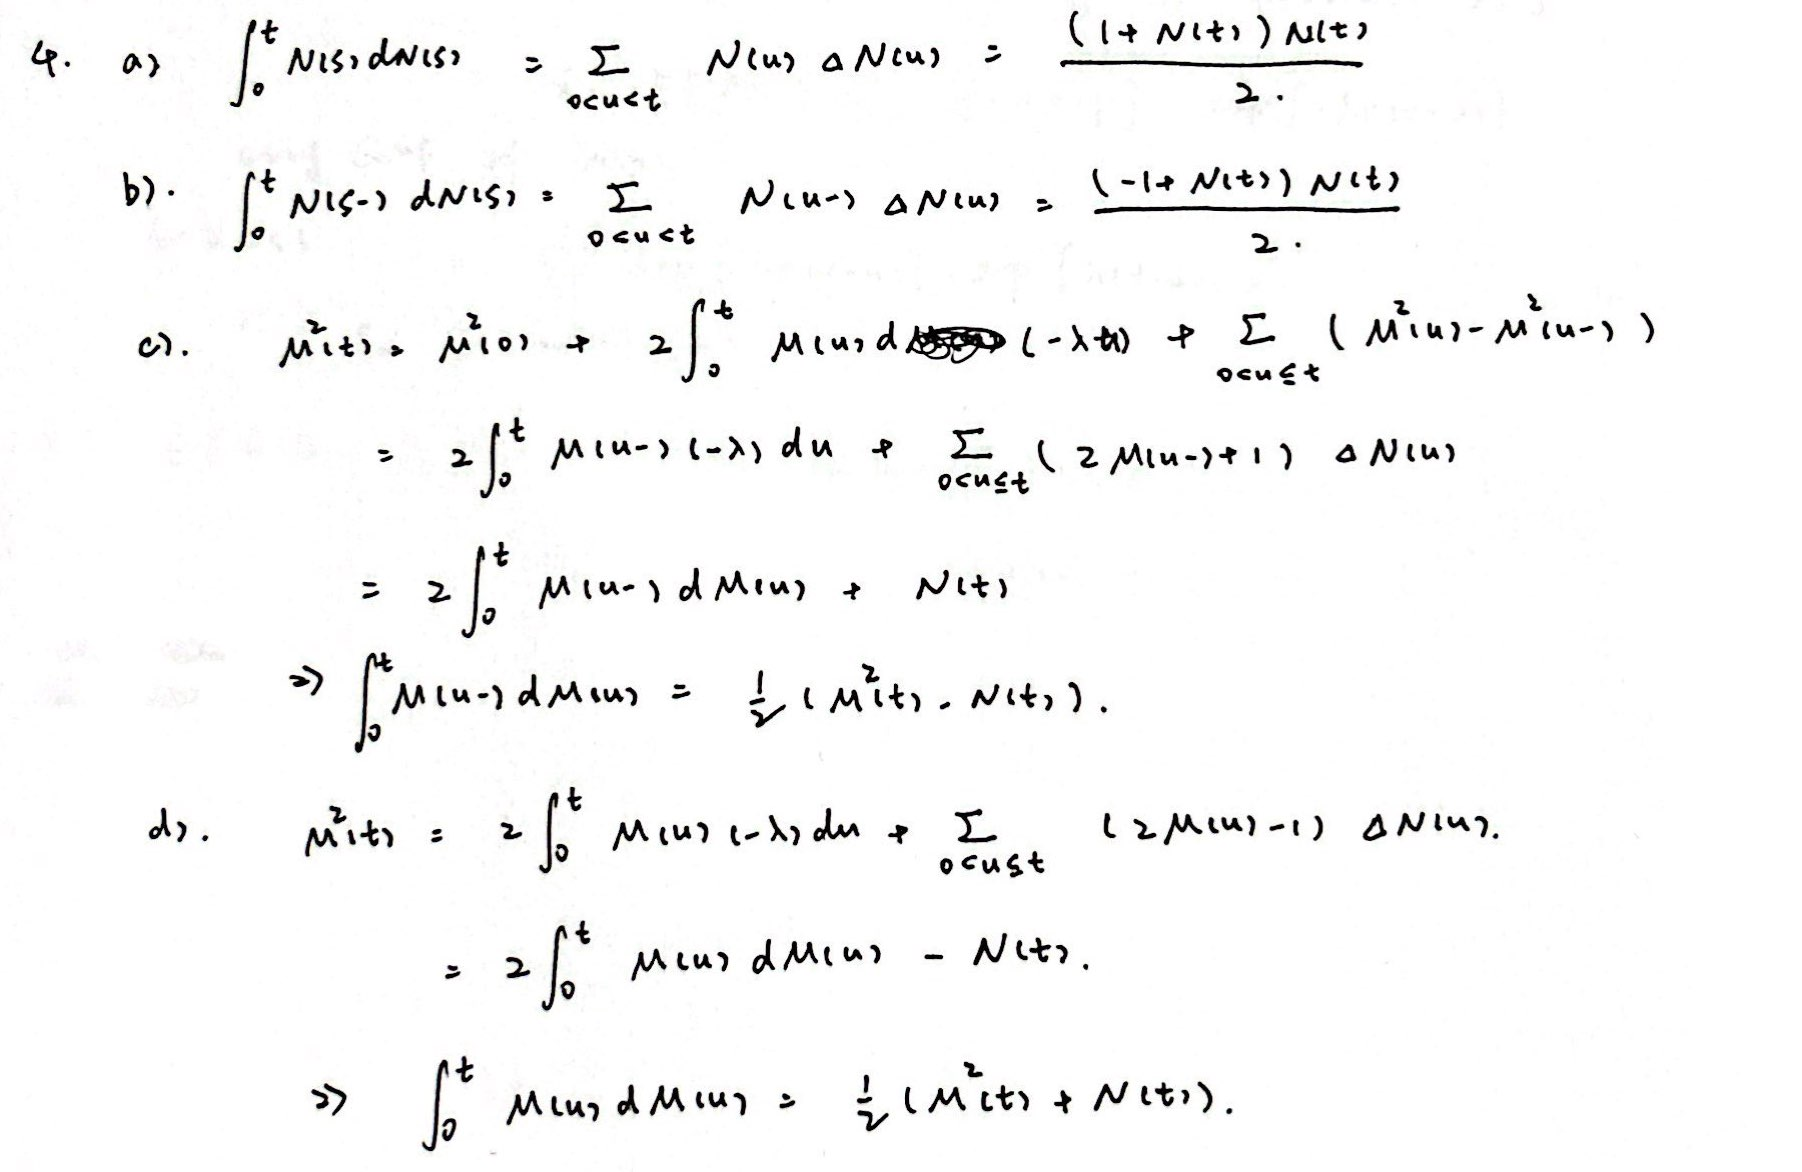

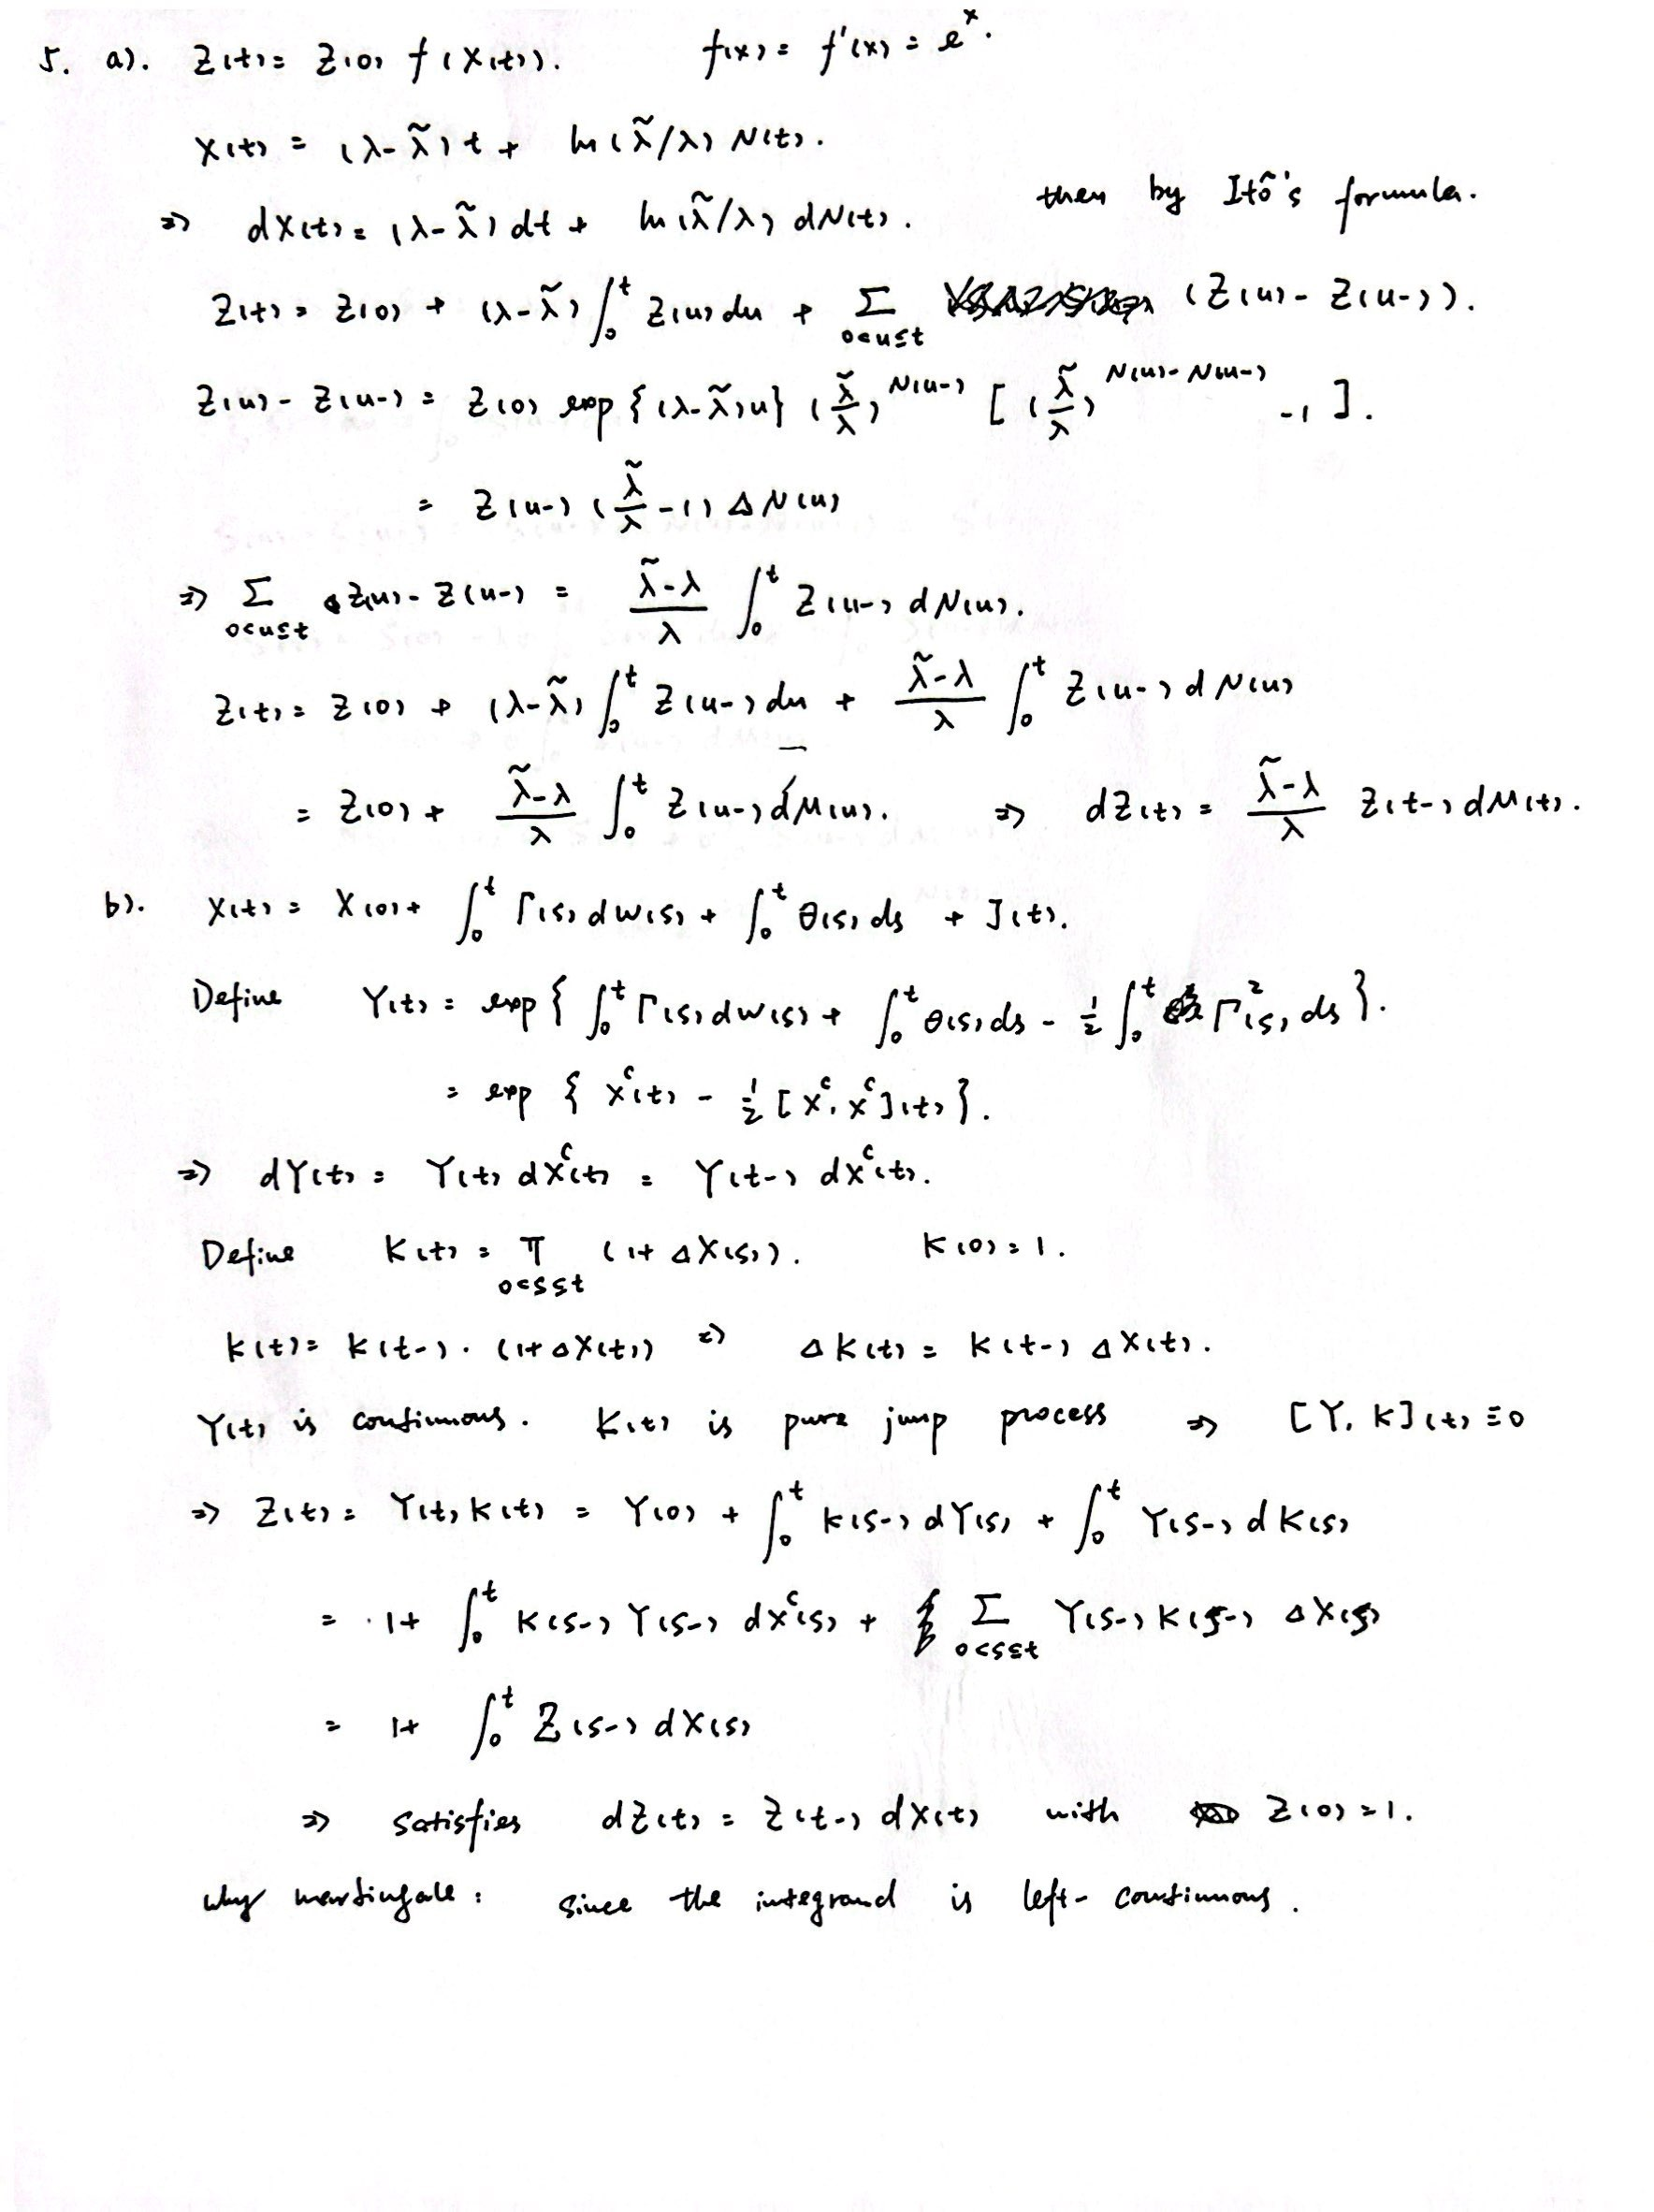

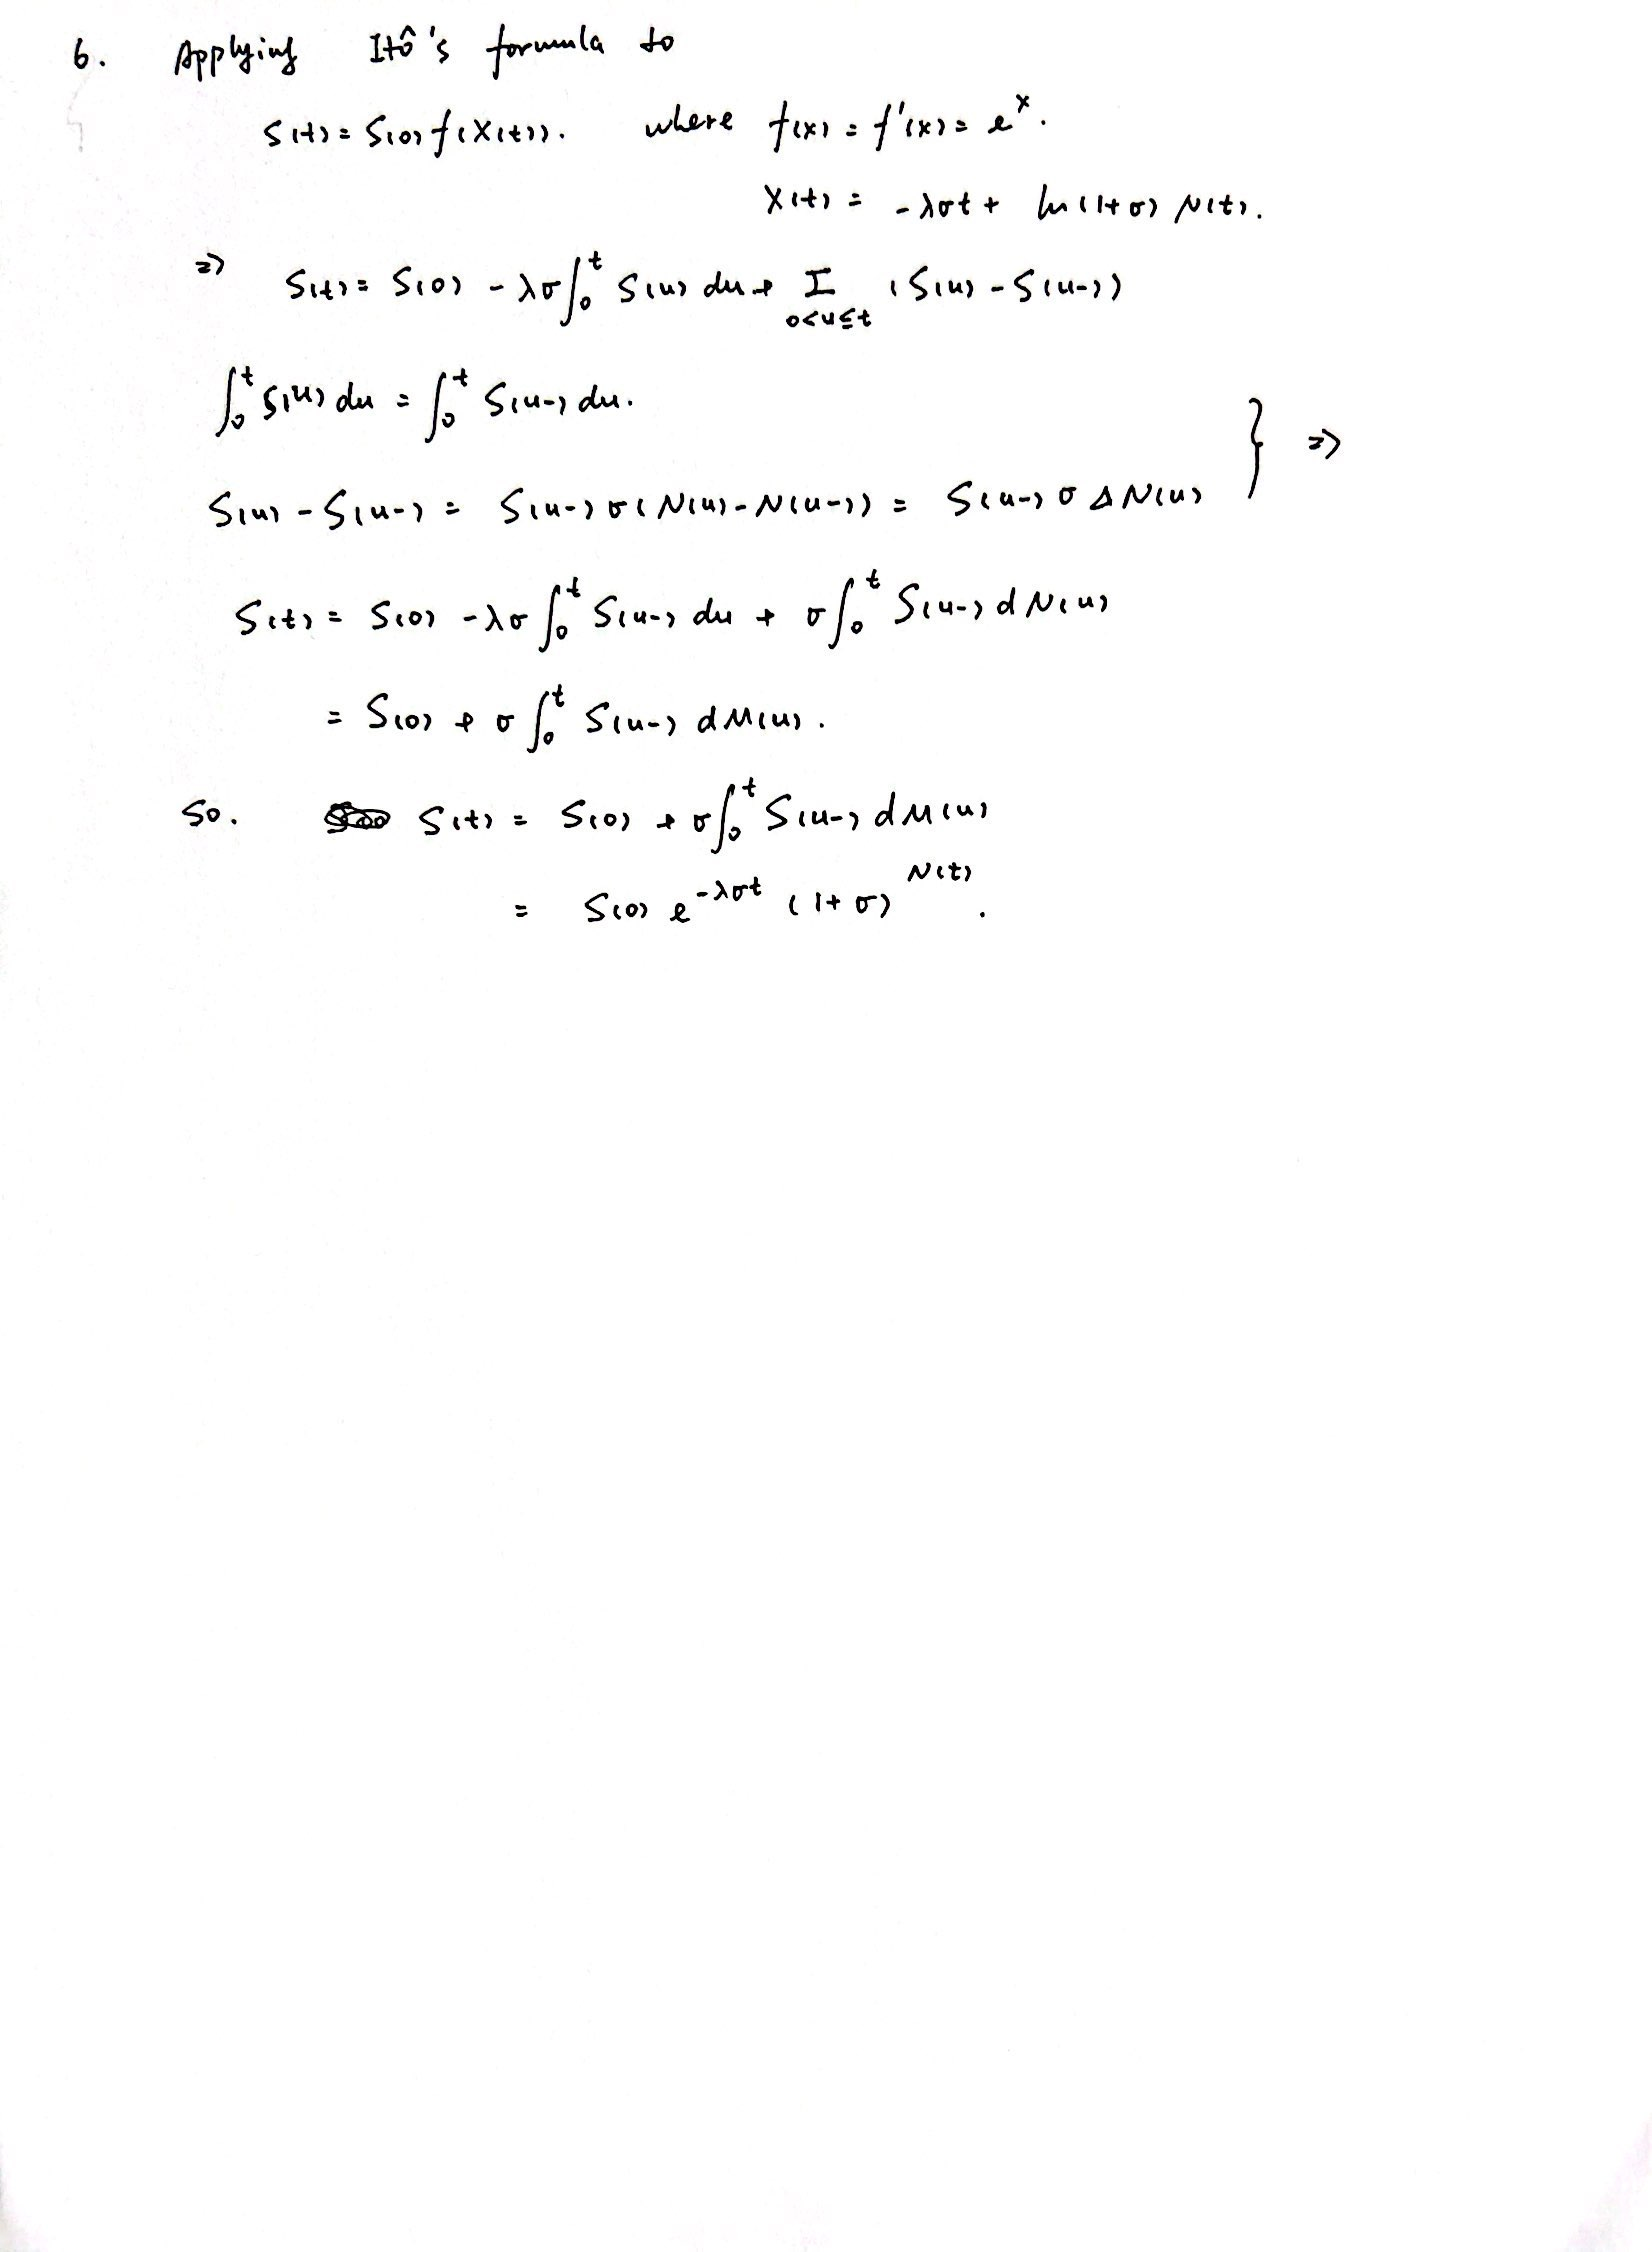

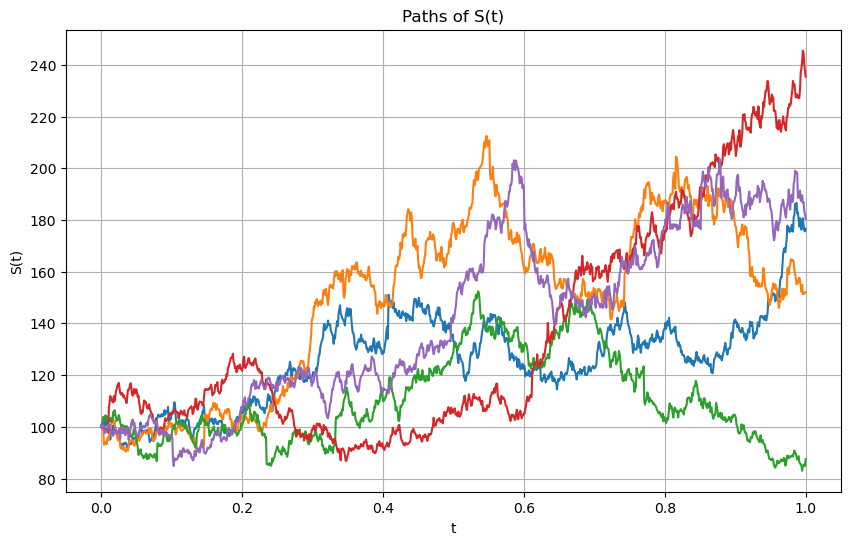

In [1]:
# Merton's jump diffusion model
import numpy as np
import matplotlib.pyplot as plt

# setup coefficients
mu = 0.2
sigma = 0.4
lbd = 10
h = 0.001
t_steps = 1000
num_paths = 5

# generate S(t)
def generate_path():
    X = np.zeros(t_steps+1)
    S = np.zeros(t_steps+1)
    X[0] = 0
    
    for i in range(t_steps):
        Z = np.random.normal(0, 1)
        N = np.random.poisson(h * lbd)
        
        if N == 0:
            M = 0
        else:
            Y = np.random.uniform(-0.1, 0.1, N)
            M = np.sum(Y)
        
        X[i+1] = X[i] + mu * h + np.sqrt(h) * sigma * Z + M
        S[i+1] = 100 * np.exp(X[i+1])
    
    S[0] = 100
    
    return S

# Define the time steps
t = np.linspace(0, 1, t_steps + 1)
# Generate and plot multiple paths of S(t)
plt.figure(figsize=(10, 6))
for _ in range(num_paths):
    S = generate_path()
    plt.plot(t, S)

plt.xlabel('t')
plt.ylabel('S(t)')
plt.title('Paths of S(t)')
plt.grid(True)
plt.show()